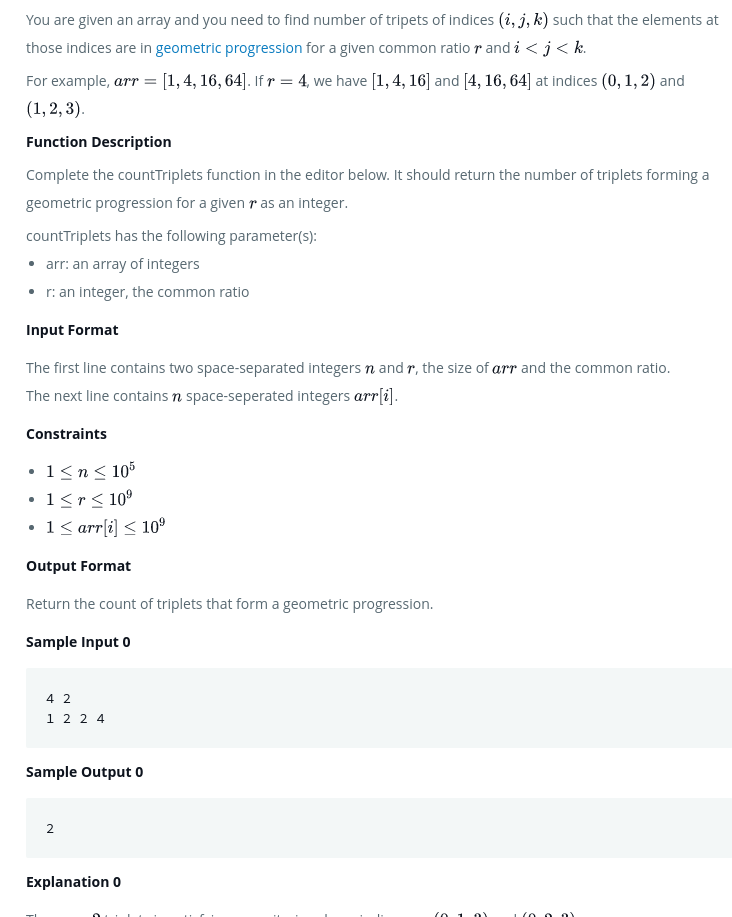

_Naive Approach_
------
#!/bin/python3

import math
import os
import random
import re
import sys

    # Complete the countTriplets function below.
    def countTriplets(arr,n, r):
        dic = {}
        for i,el in enumerate(arr):
            if(dic.get(el)):
                dic[el].append(i)
            else:
                dic[el]=[i]
        num_triplets=0
        for i,el in enumerate(arr):
            first_power_locations=dic.get(el*r)
            second_power_locations=dic.get(el*r**2)
            if first_power_locations and second_power_locations:
                # num_triplets+=sum([1 for j in first_power_locations for k in second_power_locations if i<j and j<k])
                for j in first_power_locations:
                    for k in second_power_locations:
                        if(i<j) and j<k:
                            num_triplets+=1
        return num_triplets


    if __name__ == '__main__':
        fptr = open(os.environ['OUTPUT_PATH'], 'w')

        nr = input().rstrip().split()

        n = int(nr[0])

        r = int(nr[1])

        arr = list(map(int, input().rstrip().split()))

        ans = countTriplets(arr,n, r)

        fptr.write(str(ans) + '\n')

        fptr.close()


## Faster approach below

In [1]:
#!/bin/python3

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the countTriplets function below.
def countTriplets(arr,n, r):
    previous_counter = Counter()
    next_counter = Counter(arr)
    # print(previous_counter)
    num_triplets =0
    if r==1:
        for el in next_counter:
            if (next_counter[el]>=3):
                num_triplets+= next_counter[el]*(next_counter[el]-1)*(next_counter[el]-2)//6
    else:
        for i in range(n):
            if arr[i]%r==0 and previous_counter.get(arr[i]//r,0) and next_counter.get(arr[i]*r,0):
                num_triplets+=previous_counter.get(arr[i]//r,0)*next_counter.get(arr[i]*r,0)
            previous_counter.update([arr[i]])
            next_counter[arr[i]]-=1
    return num_triplets



# if __name__ == '__main__':
#     fptr = open(os.environ['OUTPUT_PATH'], 'w')

#     nr = input().rstrip().split()

#     n = int(nr[0])

#     r = int(nr[1])

#     arr = list(map(int, input().rstrip().split()))

#     ans = countTriplets(arr,n, r)

#     fptr.write(str(ans) + '\n')

#     fptr.close()